<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/Diabetes_Data_Kernel_Mapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
Series([], dtype: int64)


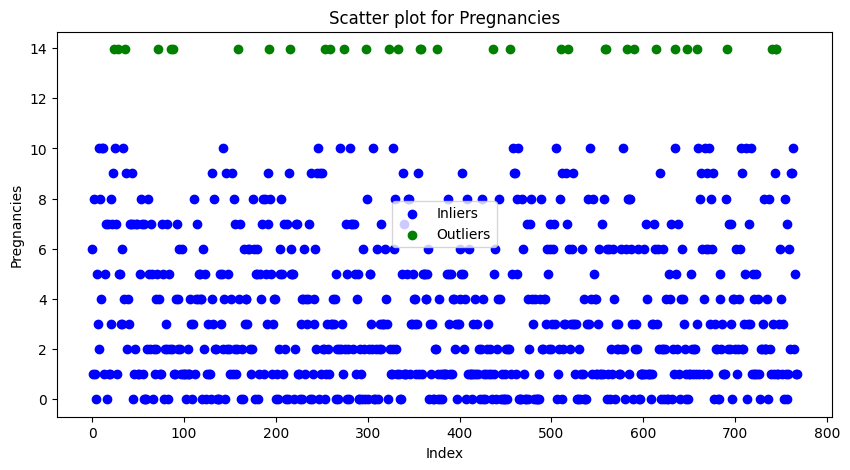

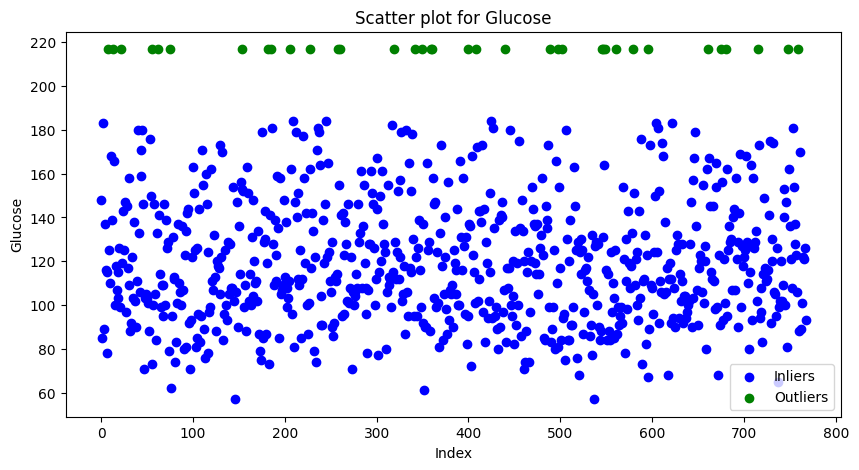

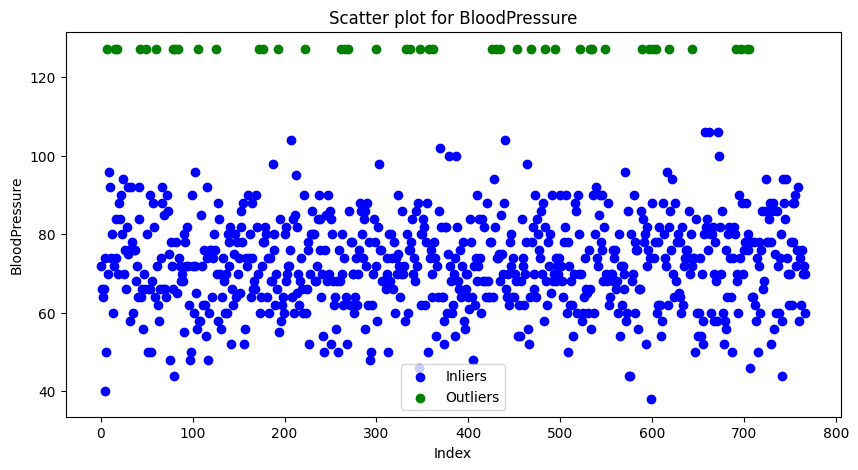

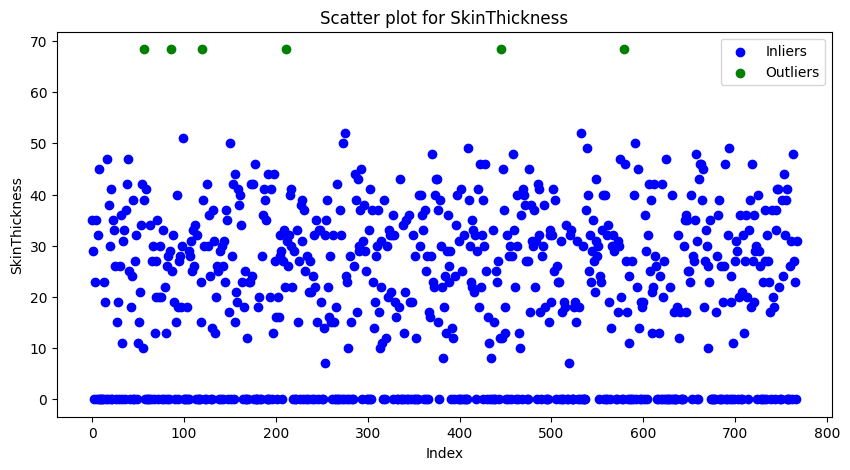

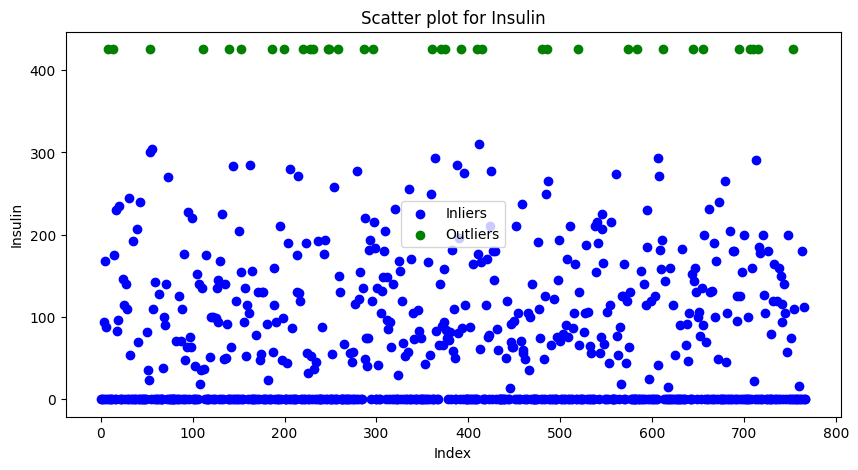

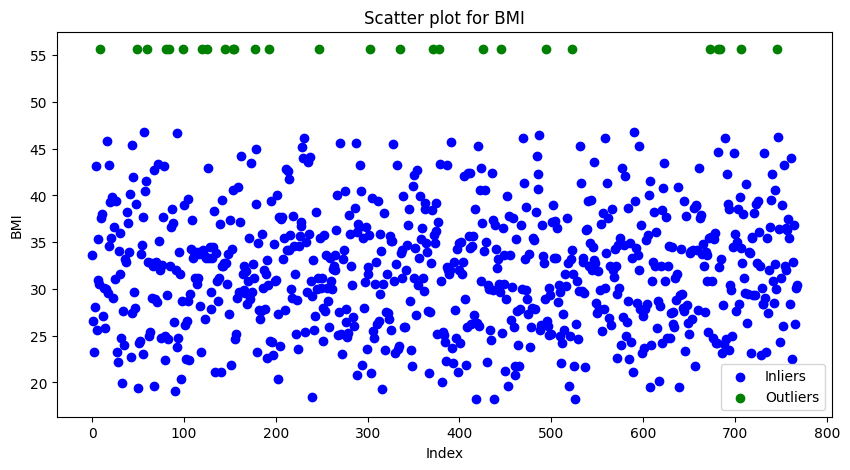

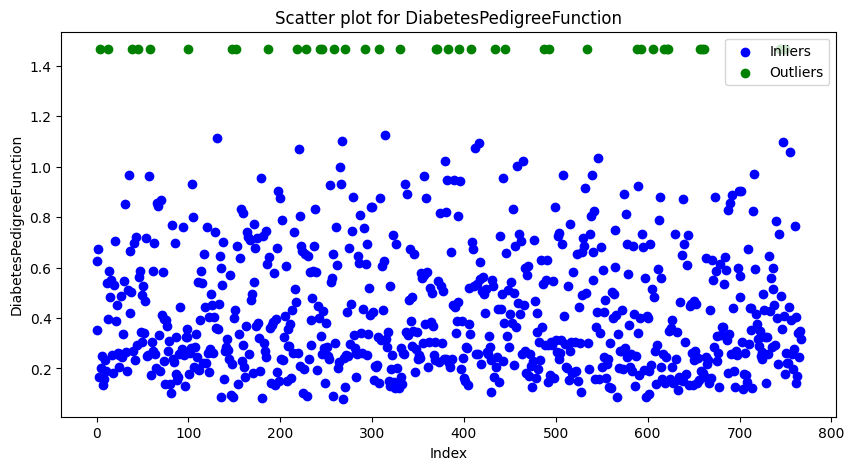

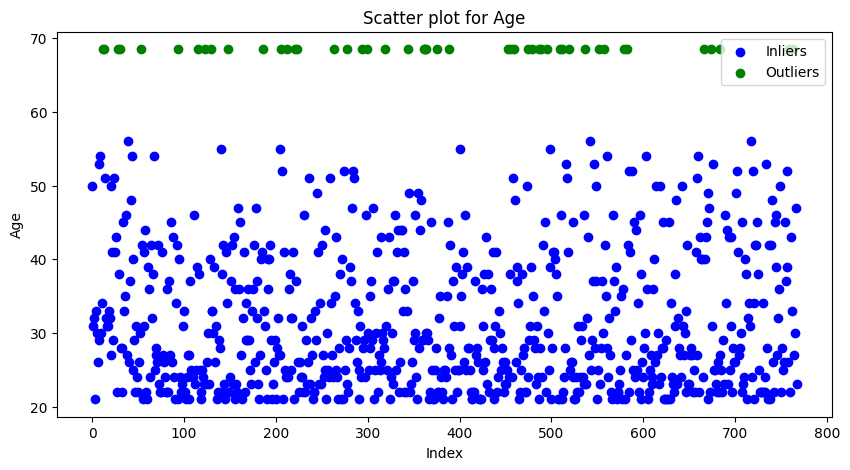

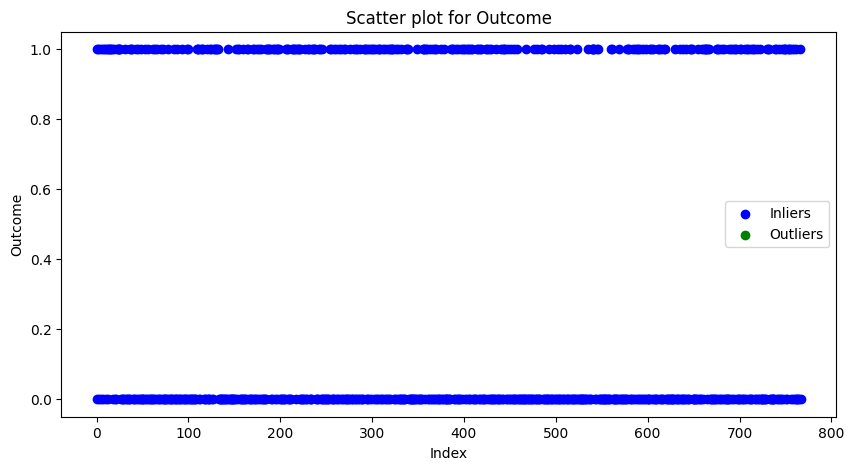

Initial number of rows: 768
Final number of rows after removing outliers: 538
The number of columns in the cleaned dataset is: 9


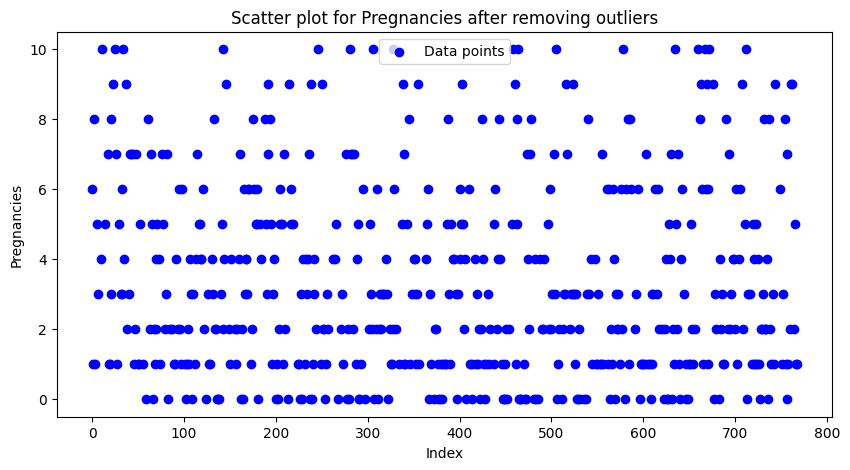

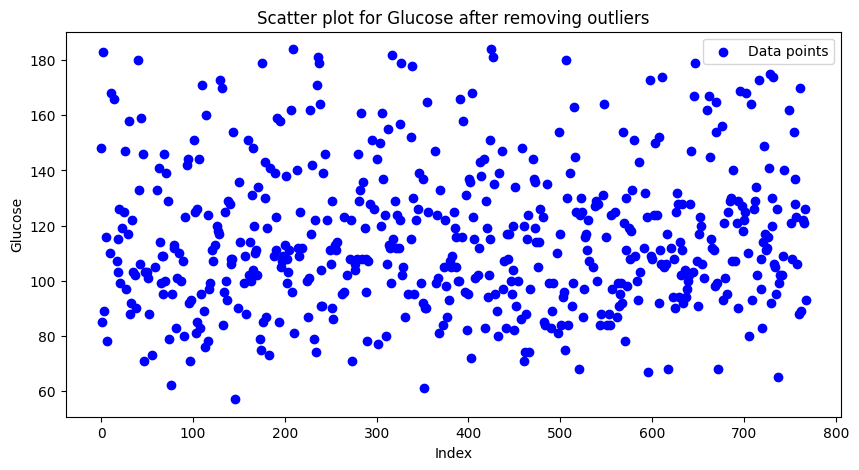

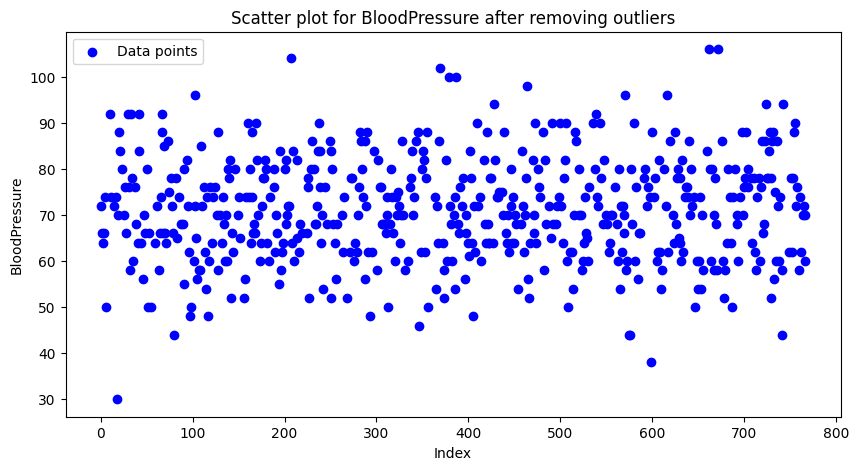

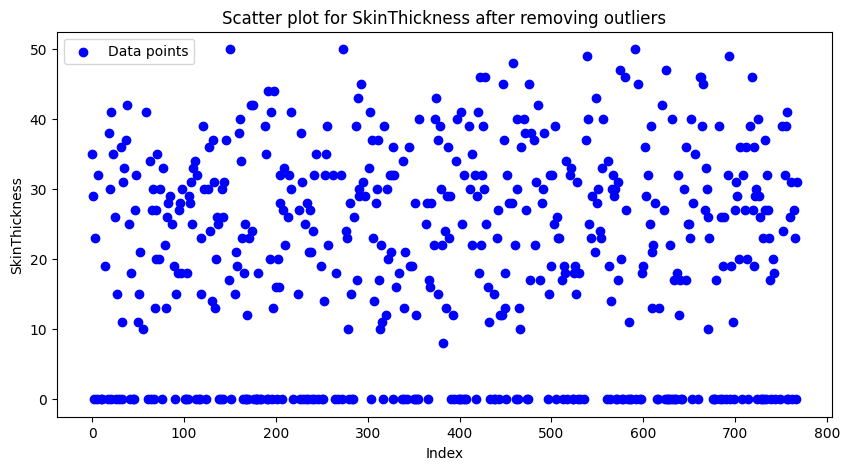

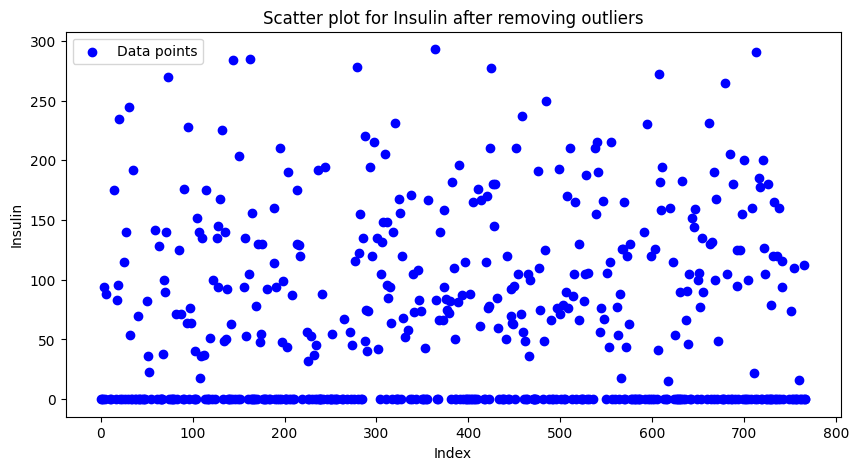

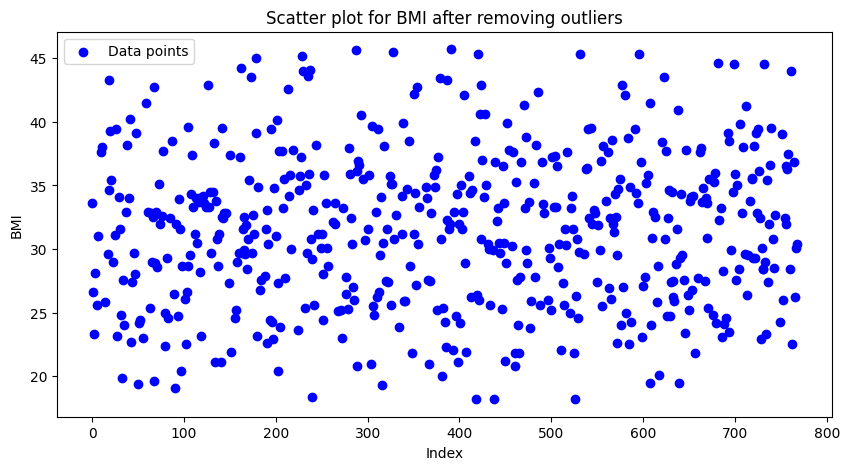

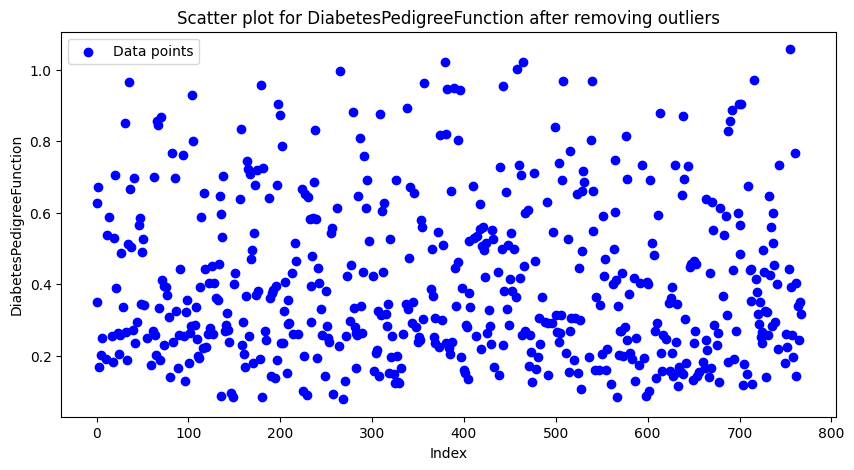

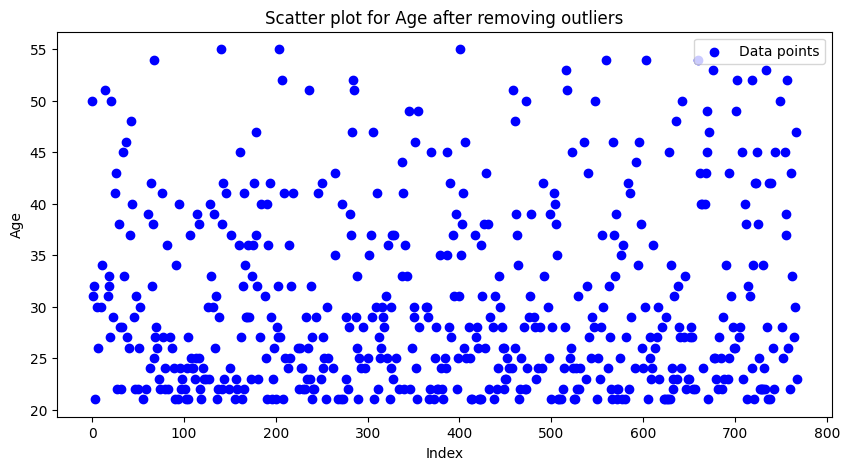

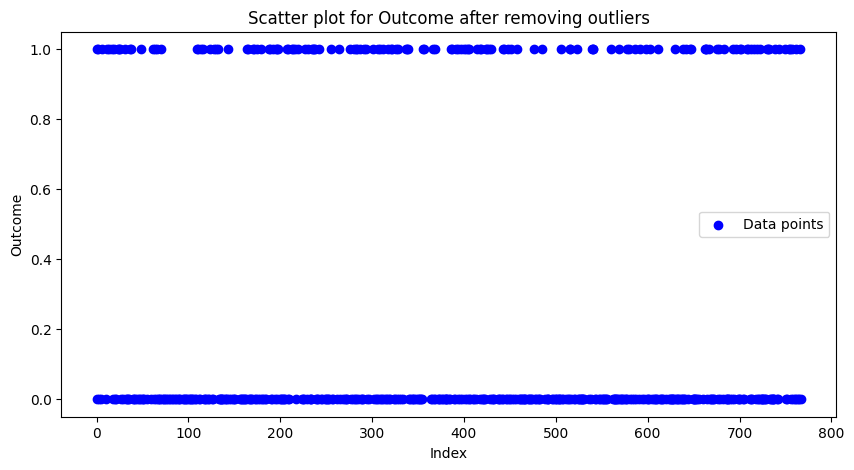

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.716535       0.552632           0.70  0.000000  0.560000   
1          0.1  0.220472       0.473684           0.58  0.000000  0.305455   
2          0.8  0.992126       0.447368           0.00  0.000000  0.185455   
3          0.1  0.251969       0.473684           0.46  0.320819  0.360000   
5          0.5  0.464567       0.578947           0.00  0.000000  0.269091   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.560776  0.852941      1.0  
1                  0.278856  0.294118      0.0  
2                  0.606742  0.323529      1.0  
3                  0.090909  0.000000      0.0  
5                  0.125638  0.264706      0.0  


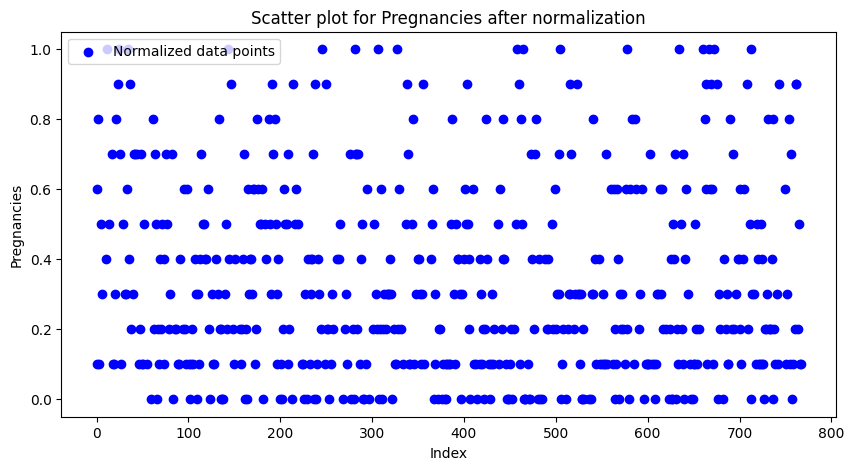

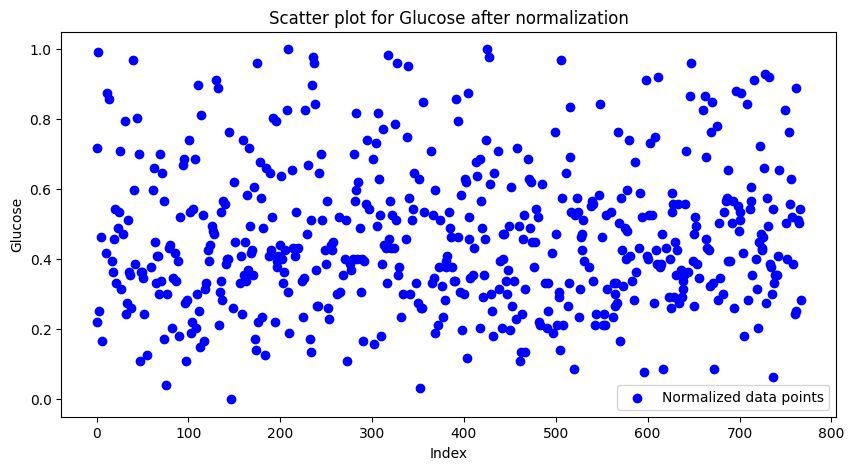

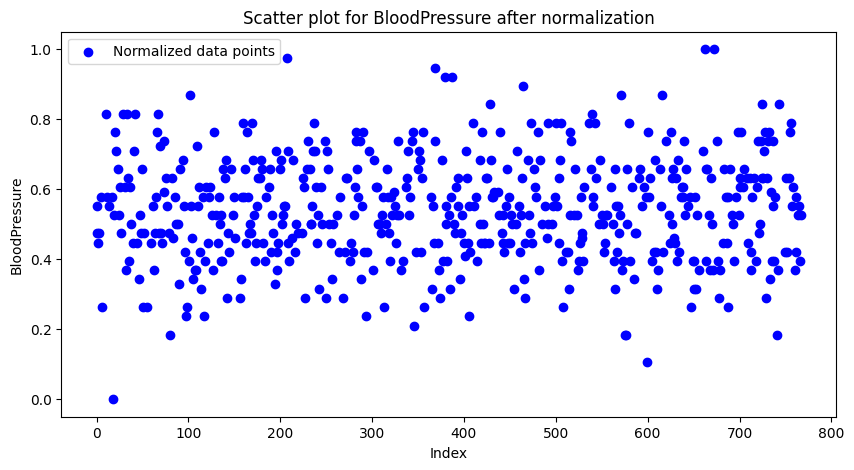

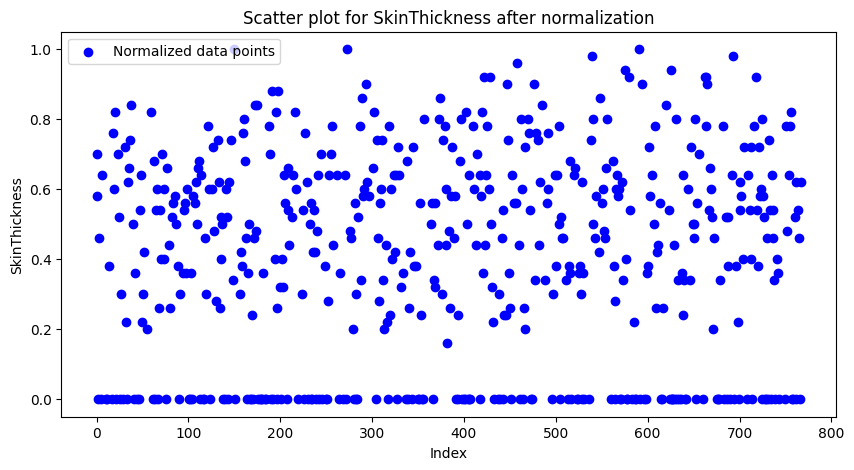

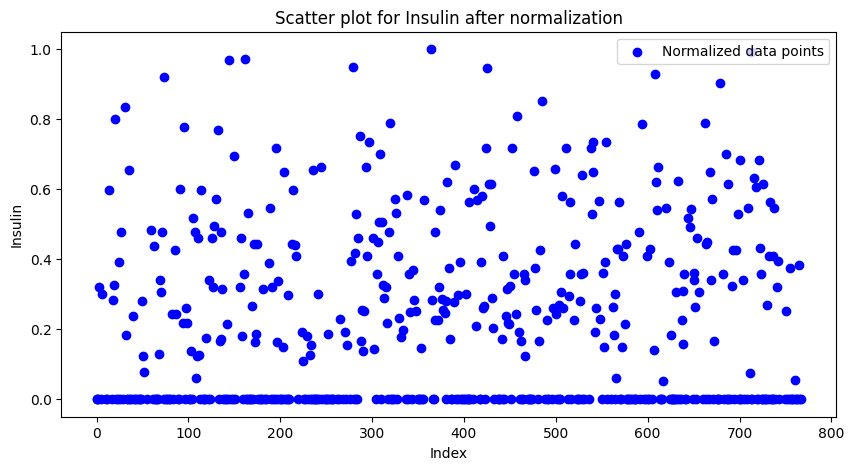

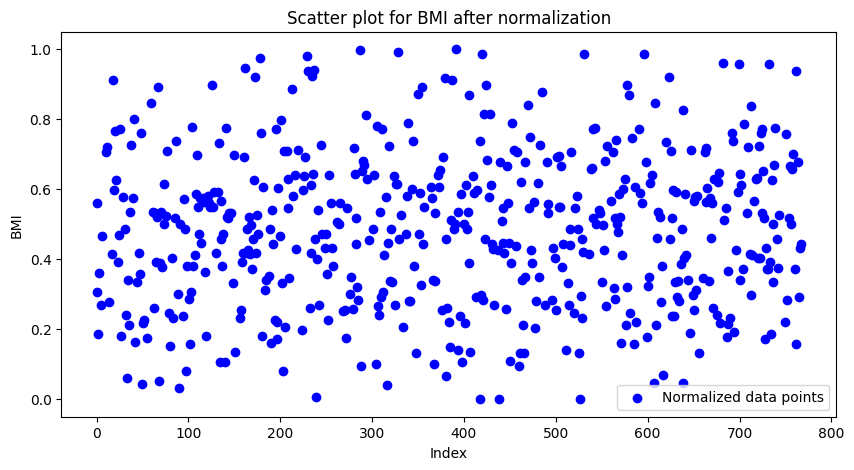

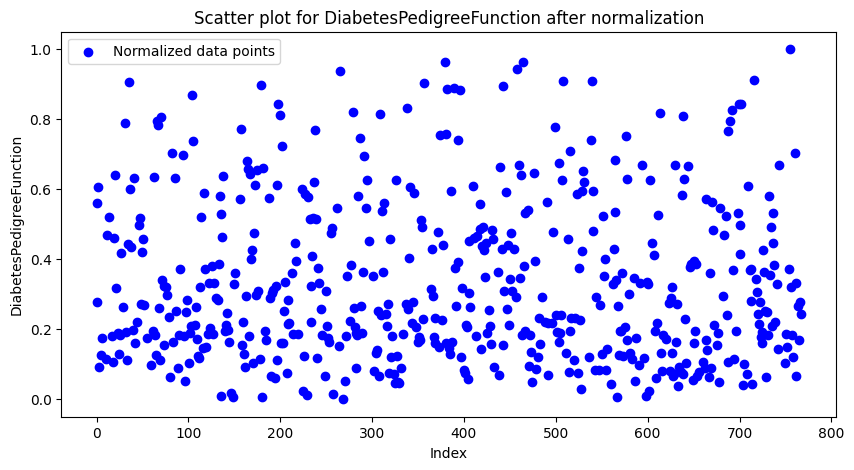

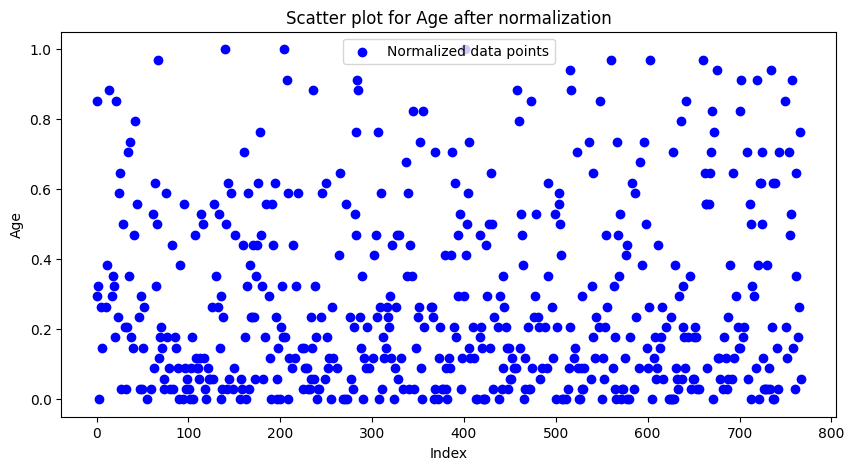

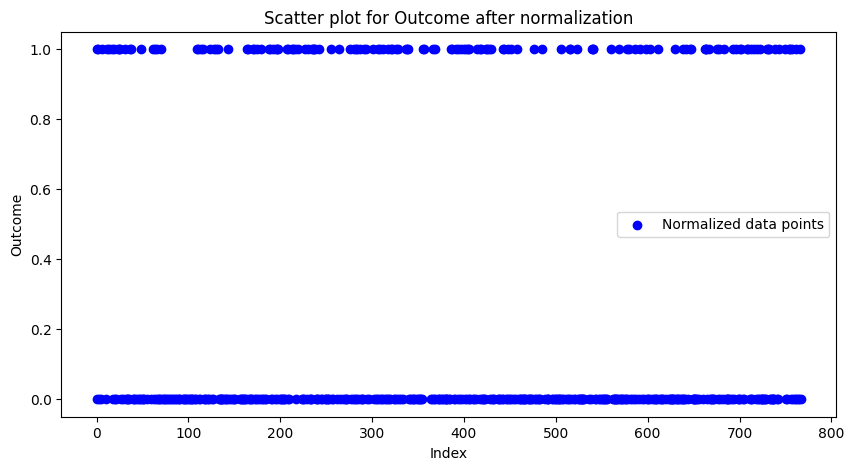

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = 'diabetes.csv'
diabetes_data = pd.read_csv(file_path)

# Handle missing values
missing_values = diabetes_data.isnull().sum()
print("Missing values:")
print(missing_values[missing_values > 0])

# Impute numeric columns with mean
numeric_cols = diabetes_data.select_dtypes(include=['number']).columns
diabetes_data[numeric_cols] = diabetes_data[numeric_cols].fillna(diabetes_data[numeric_cols].mean())

# Impute categorical columns with mode
non_numeric_cols = diabetes_data.select_dtypes(include=['object']).columns
for col in non_numeric_cols:
    diabetes_data[col].fillna(diabetes_data[col].mode()[0], inplace=True)

# Function to identify outliers based on mean and standard deviation
def identify_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    inliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return inliers, outliers, mean, std

# Columns to check for outliers
numeric_columns = numeric_cols

# Initial number of rows
initial_rows = diabetes_data.shape[0]

# Plotting scatter plots for each column to identify and highlight outliers visually
for column in numeric_columns:
    data = diabetes_data[column].dropna()
    inliers, outliers, mean_value, std_value = identify_outliers(diabetes_data, column)

    plt.figure(figsize=(10, 5))
    plt.scatter(inliers.index, inliers[column], color='blue', label='Inliers')
    plt.scatter(outliers.index, [mean_value + 3 * std_value] * len(outliers), color='green', label='Outliers') # Move outliers to the top
    plt.title(f'Scatter plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Removing outliers for each specified column
for column in numeric_columns:
    _, outliers, _, _ = identify_outliers(diabetes_data, column)
    diabetes_data = diabetes_data.drop(outliers.index)

# Number of rows after removing outliers
final_rows = diabetes_data.shape[0]

# Print the number of columns and rows before and after removing outliers
print(f"Initial number of rows: {initial_rows}")
print(f"Final number of rows after removing outliers: {final_rows}")
print(f"The number of columns in the cleaned dataset is: {diabetes_data.shape[1]}")

# Plotting scatter plots again to verify outliers are removed
for column in numeric_columns:
    data = diabetes_data[column].dropna()
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data, color='blue', label='Data points')
    plt.title(f'Scatter plot for {column} after removing outliers')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

# Normalizing the numeric columns
scaler = MinMaxScaler()
diabetes_data_normalized = diabetes_data.copy()
diabetes_data_normalized[numeric_columns] = scaler.fit_transform(diabetes_data[numeric_columns])

# Display the first few rows of the normalized data
print(diabetes_data_normalized.head())

# Plotting scatter plots to verify normalization
for column in numeric_columns:
    data = diabetes_data_normalized[column].dropna()
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data, color='blue', label='Normalized data points')
    plt.title(f'Scatter plot for {column} after normalization')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()


<Figure size 1500x1500 with 0 Axes>

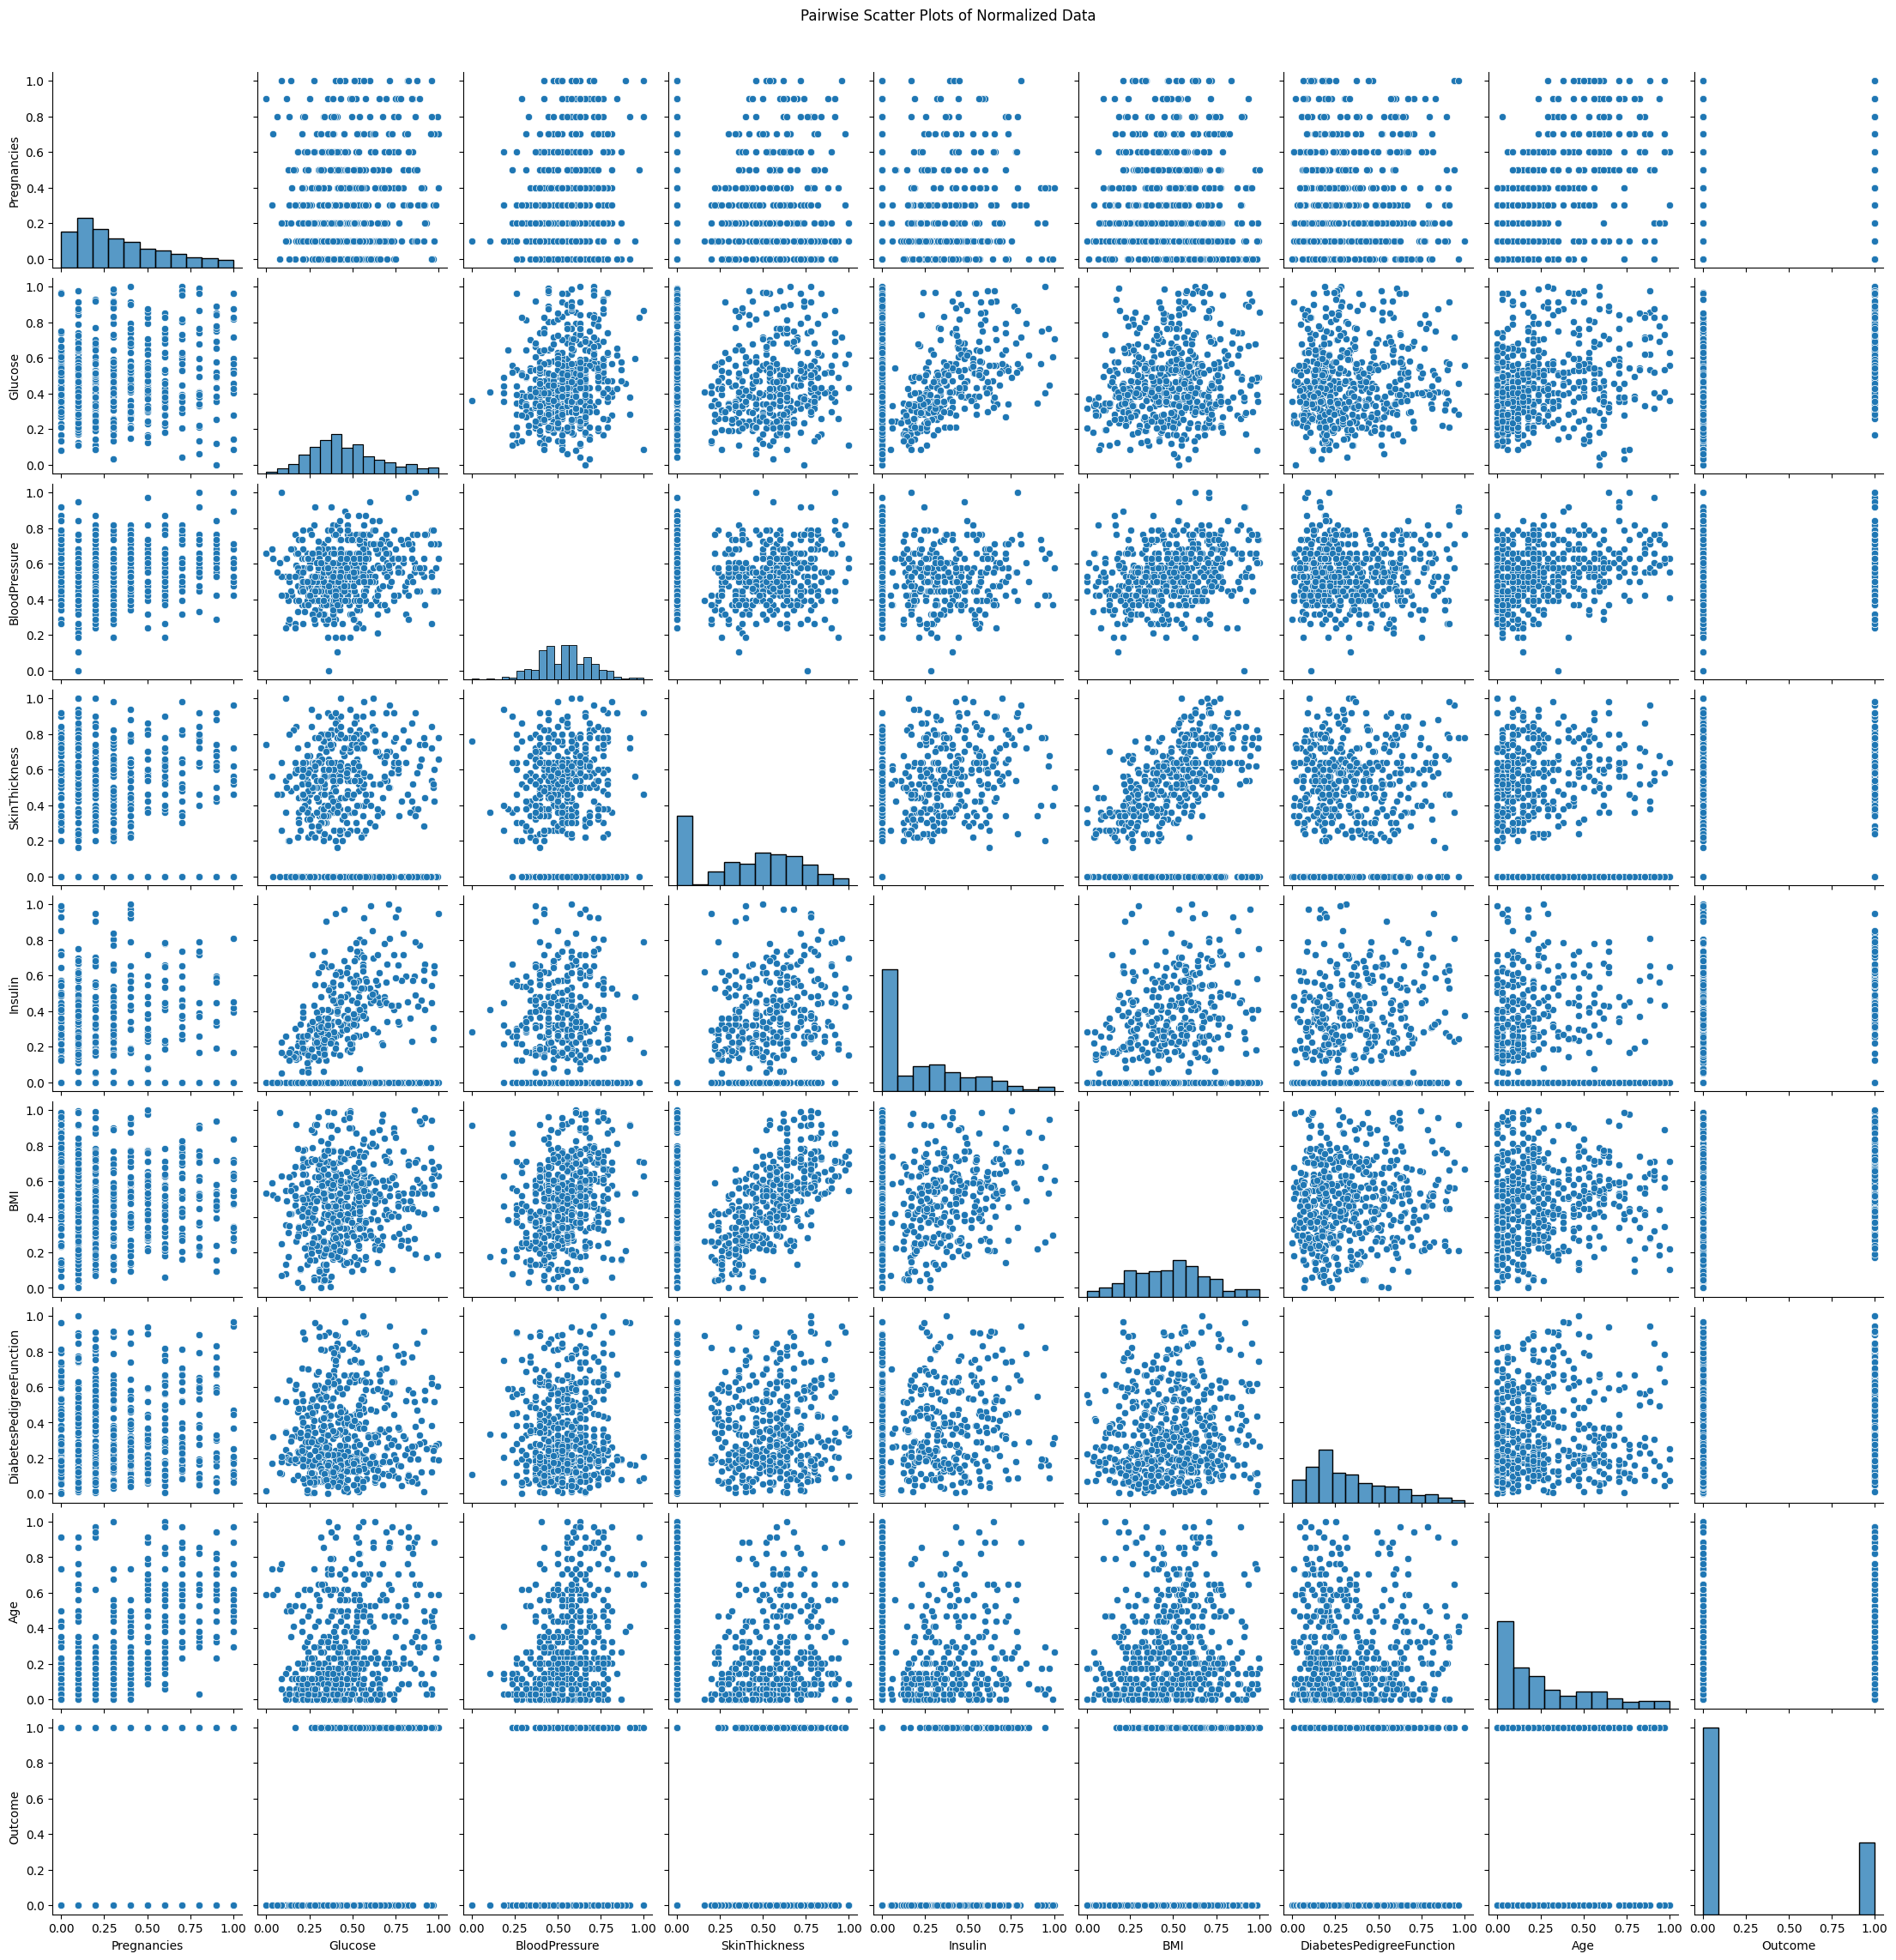

In [ ]:
# Visualizing non-linear relationships using scatter plots
import seaborn as sns

# Pairwise scatter plots
plt.figure(figsize=(15, 15))
sns.pairplot(diabetes_data_normalized)
plt.suptitle("Pairwise Scatter Plots of Normalized Data", y=1.02)
plt.show()


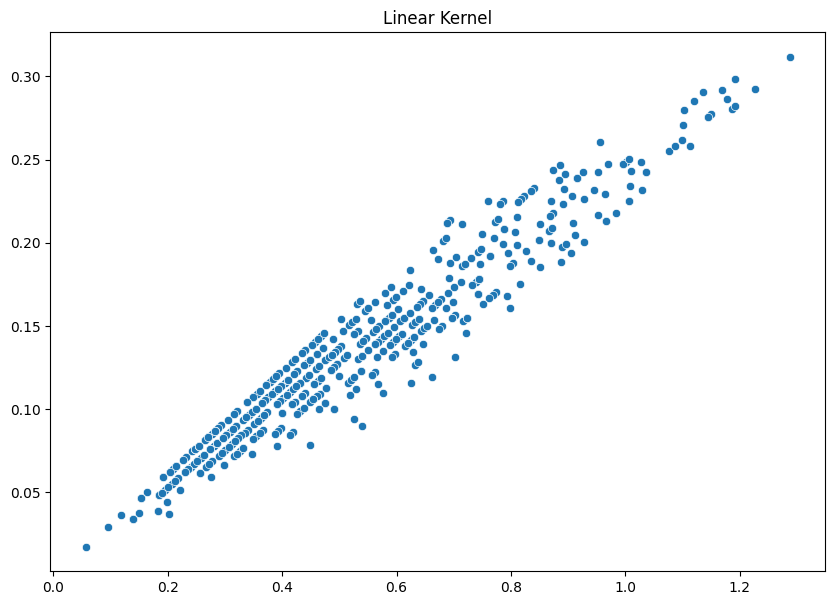

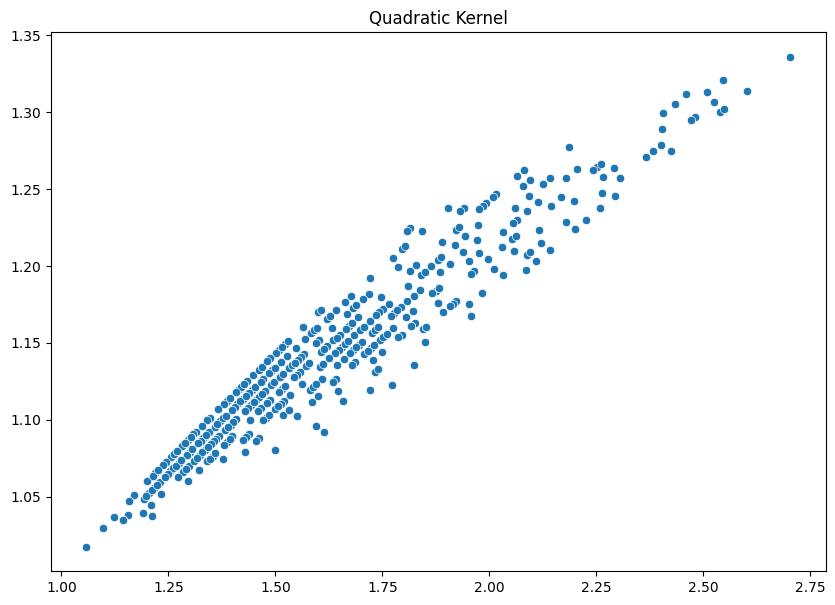

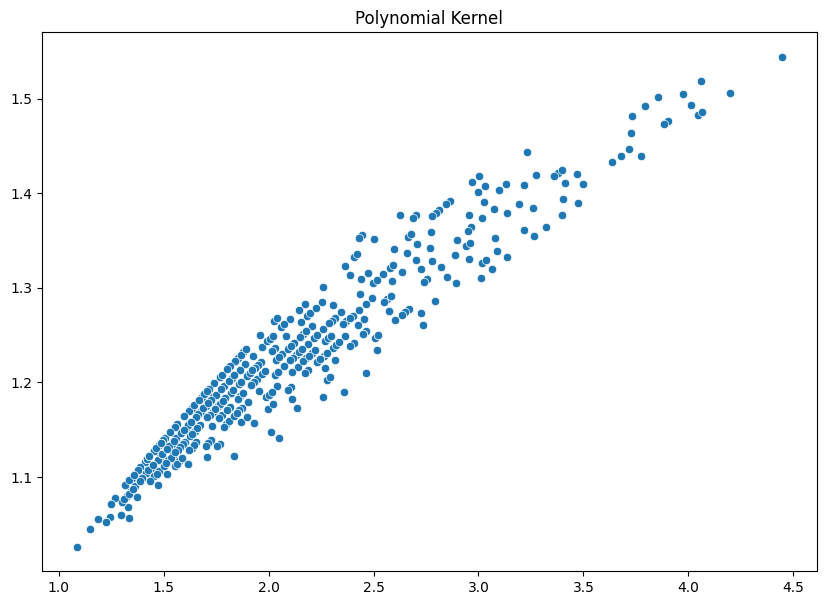

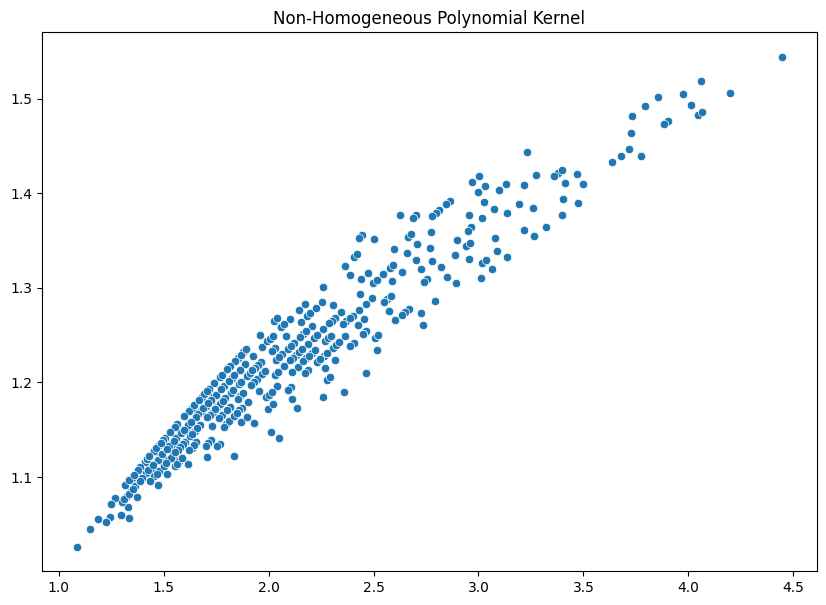

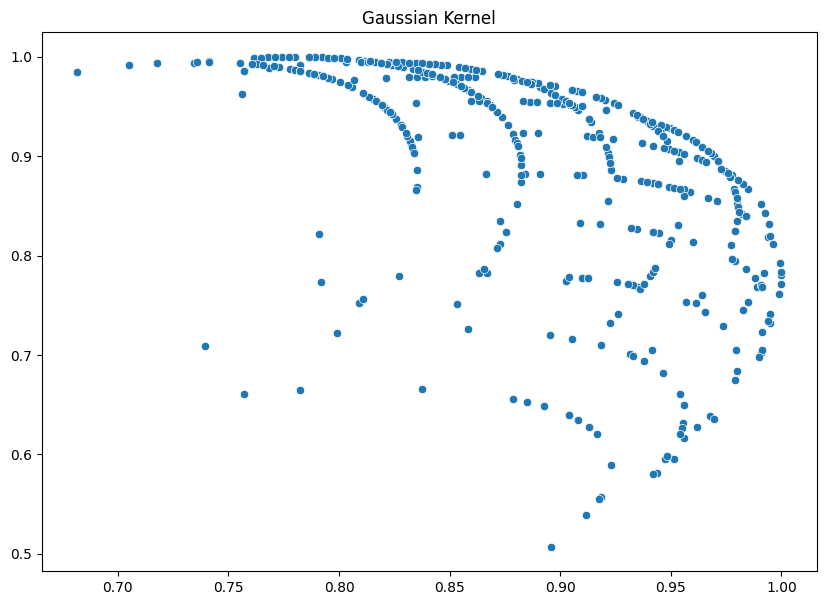

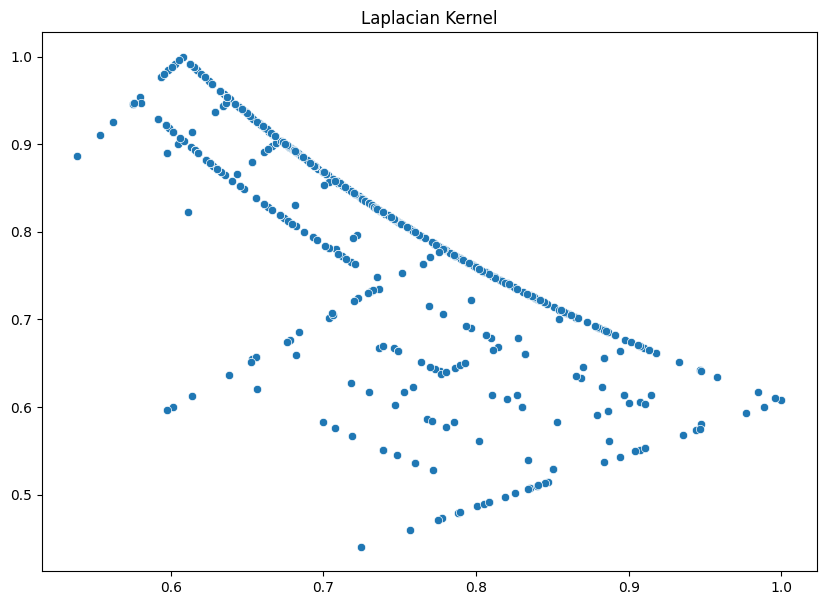

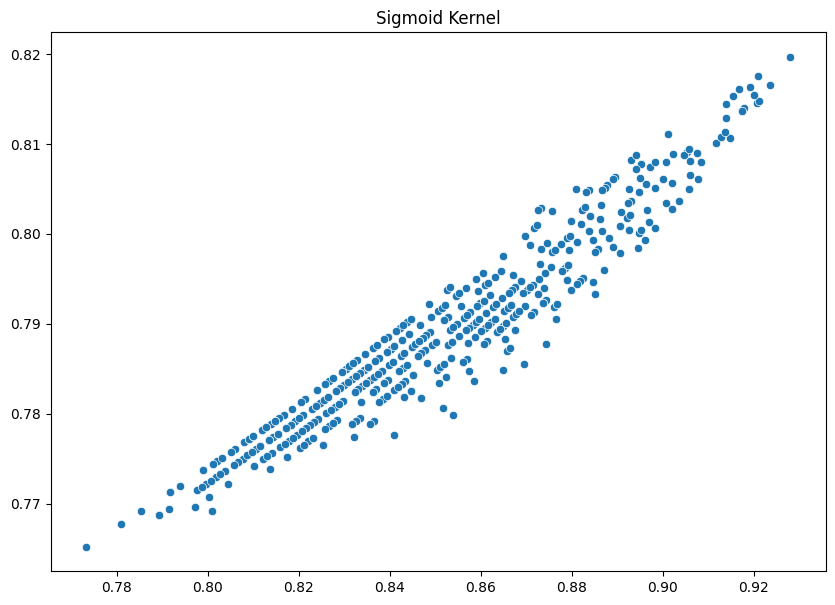

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import linear_kernel, polynomial_kernel, rbf_kernel, laplacian_kernel, sigmoid_kernel

# Helper function to plot data
def plot_transformed_data(X, title):
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=X[:, 0], y=X[:, 1])
    plt.title(title)
    plt.show()

# Selecting the first two features for visualization
data_samples = diabetes_data_normalized.iloc[:, :2].values

# Applying Linear Kernel
linear_transformed = linear_kernel(data_samples)
plot_transformed_data(linear_transformed, 'Linear Kernel')

# Applying Quadratic Kernel (degree=2)
quadratic_transformed = polynomial_kernel(data_samples, degree=2)
plot_transformed_data(quadratic_transformed, 'Quadratic Kernel')

# Applying Polynomial Kernel (degree=3)
polynomial_transformed = polynomial_kernel(data_samples, degree=3)
plot_transformed_data(polynomial_transformed, 'Polynomial Kernel')

# Applying Non-Homogeneous Polynomial Kernel (degree=3, coef0=1)
non_homogeneous_transformed = polynomial_kernel(data_samples, degree=3, coef0=1)
plot_transformed_data(non_homogeneous_transformed, 'Non-Homogeneous Polynomial Kernel')

# Applying Gaussian (RBF) Kernel
gaussian_transformed = rbf_kernel(data_samples)
plot_transformed_data(gaussian_transformed, 'Gaussian Kernel')

# Applying Laplacian Kernel
laplacian_transformed = laplacian_kernel(data_samples)
plot_transformed_data(laplacian_transformed, 'Laplacian Kernel')

# Applying Sigmoid Kernel
sigmoid_transformed = sigmoid_kernel(data_samples)
plot_transformed_data(sigmoid_transformed, 'Sigmoid Kernel')
